# Análisis de datos cuantitativos con Python

![](tipos_datos.jpg)

## Introducción

Es importante reconocer los distintos tipos de [datos](https://es.wikipedia.org/wiki/Dato) con que nos podemos encontrar al realizar análisis [estadísticos](http://relopezbriega.github.io/tag/estadistica.html) y como podemos trabajar con los [datos categóricos](https://en.wikipedia.org/wiki/Categorical_variable). En esta oportunidad, vamos a ver como podemos manipular, interpretar y obtener información de los [datos cuantitativos](https://es.wikipedia.org/wiki/Cantidad).

Recordemos que las [variables cuantitativas](https://es.wikipedia.org/wiki/Cantidad) son variables medidas en una escala numérica. Altura, peso, tiempo de respuesta, la calificación subjetiva del dolor, la temperatura, y la puntuación en un examen, son ejemplos de [variables cuantitativas](https://es.wikipedia.org/wiki/Cantidad). Las [variables cuantitativas](https://es.wikipedia.org/wiki/Cantidad) se distinguen de las [variables categóricas](http://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/) (también llamadas cualitativas) como el color favorito, religión, ciudad de nacimiento, y el deporte favorito; en las que no hay un orden o medida involucrados. 

## Analizando datos cuantitativos con Python

Para los ejemplos de cuaderno, vamos a trabajar con el [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) [faithful](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat), el cual consiste en una colección de observaciones sobre las erupciones del [géiser](https://es.wikipedia.org/wiki/G%C3%A9iser) [Old Faithful](https://en.wikipedia.org/wiki/Old_Faithful) en el [parque nacional Yellowstone](https://es.wikipedia.org/wiki/Parque_nacional_de_Yellowstone) de los Estados Unidos. La información que contiene este [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) es la siguiente:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import pandas as pd 
import seaborn as sns 
from pydataset import data

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [2]:
faithful = data('faithful')
faithful.head(10)

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.700,88
8,3.600,85
9,1.950,51
10,4.350,85


Como podemos ver, [faithful](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat) es un [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) bastante simple que solo contiene observaciones de dos variables; la primera, que se llama `eruptions`, contiene la información de la duración de la erupción del [géiser](https://es.wikipedia.org/wiki/G%C3%A9iser); mientras que la segunda, se llama `waiting` y contiene la información sobre el tiempo de espera para la siguiente erupción del [géiser](https://es.wikipedia.org/wiki/G%C3%A9iser).

Al igual de como  cuando analizamos [datos categóricos](http://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/), lo primero que deberíamos intentar hacer es crear una imagen que represente de la mejor manera posible a nuestros [datos](https://es.wikipedia.org/wiki/Dato), ya que nuestro cerebro tiende a procesar mejor la información visual. Para el caso de las [variables cuantitativas](https://es.wikipedia.org/wiki/Cantidad), un buen candidato para comenzar a  hacernos una imagen de lo que nuestros datos representan, son los [histogramas](https://es.wikipedia.org/wiki/Histograma).

### Histogramas

Para las [variables cuantitativas](https://es.wikipedia.org/wiki/Cantidad), a diferencia de lo que pasaba con las [variables categóricas](http://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/), no existe una forma obvia de agrupar los datos; por tal motivo lo que se suele hacer es, dividir los posibles valores en diferentes *contenedores* del mismo tamaño y luego contar el número de casos que cae dentro de cada uno de los *contenedores*. Estos *contenedores* junto con sus recuentos, nos proporcionan una imagen de la [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) de la [variable cuantitativa](https://es.wikipedia.org/wiki/Cantidad) y constituyen la base para poder graficar el [histograma](https://es.wikipedia.org/wiki/Histograma). Para construir el gráfico, simplemente  debemos representar a los recuentos como barras y graficarlas contra los valores de cada uno de los *contenedores*. 

Con [Python](http://python.org/) podemos representar fácilmente el [histograma](https://es.wikipedia.org/wiki/Histograma) de la variable `eruptions` utilizando el método `hist` del `DataFrame` de [Pandas](http://pandas.pydata.org/) del siguiente modo:

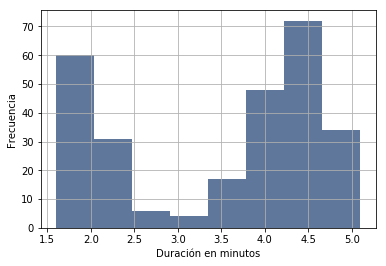

In [3]:
# histograma duración de erupciones con 8 barras
faithful['eruptions'].hist(bins=8) 
plt.xlabel("Duración en minutos")
plt.ylabel("Frecuencia")
plt.show()

Como podemos ver en el gráfico, la duración más frecuente de las erupciones del [géiser](https://es.wikipedia.org/wiki/G%C3%A9iser) ronda en alrededor de cuatro minutos y medio. Una cosa que debemos hacer notar es que en los [histogramas](https://es.wikipedia.org/wiki/Histograma), los *contenedores* dividen a todos los valores de la [variable cuantitativa](https://es.wikipedia.org/wiki/Cantidad), por lo que no deberíamos encontrar espacios entre las barras (a diferencia de lo que pasaba con los [gráficos de barras](https://es.wikipedia.org/wiki/Diagrama_de_barras) que vimos en el [artículo anterior](http://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/)). Cualquier espacio entre las barras es una brecha en los [datos](https://es.wikipedia.org/wiki/Dato), que nos indica un región para la que no existen valores.

#### Distribución de frecuencia

Un tema íntimamente relacionado con los [histogramas](https://es.wikipedia.org/wiki/Histograma) son las tablas de [distribución de frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica), en definitiva los [histogramas](https://es.wikipedia.org/wiki/Histograma) no son más que gráficos de tablas de [distribución de frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica). La [distribución de frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica) de una [variable cuantitativa](https://es.wikipedia.org/wiki/Cantidad) consiste en un resumen de la ocurrencia de un [dato](https://es.wikipedia.org/wiki/Dato) dentro de una colección de categorías que no se superponen. Estas categorías las vamos a poder armar según nuestra conveniencia y lo que queramos analizar. Por ejemplo si quisiéramos armar la [distribución de frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica) de la variable `eruptions` podríamos realizar las siguiente manipulaciones con [Pandas](http://pandas.pydata.org/):

In [4]:
# Distribución de frecuencia.
# 1ro creamos un rango para las categorías.
contenedores = np.arange(1.5, 6., 0.5)

# luego cortamos los datos en cada contenedor 
frec = pd.cut(faithful['eruptions'], contenedores)

# por último hacemos el recuento de los contenedores
# para armar la tabla de frecuencia.
tabla_frec = pd.value_counts(frec)
tabla_frec

(4.0, 4.5]    75
(1.5, 2.0]    55
(4.5, 5.0]    54
(2.0, 2.5]    37
(3.5, 4.0]    34
(3.0, 3.5]     9
(2.5, 3.0]     5
(5.0, 5.5]     3
Name: eruptions, dtype: int64

Como nos nuestra esta tabla de [distribución de frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica), la duración que más veces ocurre para las erupciones, se encuentran en el rango de 4 a 4.5 minutos.

### Diagrama de tallos y hojas

Los [histogramas](https://es.wikipedia.org/wiki/Histograma) nos permiten apreciar la [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) de los [datos](https://es.wikipedia.org/wiki/Dato) de una forma sencilla, pero los mismos no nos muestran los valores del [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) en sí mismos. Para solucionar esto, existe el [diagrama de tallos y hojas](https://es.wikipedia.org/wiki/Diagrama_de_tallos_y_hojas), el cual es similar al [histograma](https://es.wikipedia.org/wiki/Histograma) pero nos muestra los valores individuales de nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos). Para que quede más claro, vemos un ejemplo sencillo. Supongamos que tenemos una muestra sobre el ritmo cardíaco de 24 mujeres, las observaciones son las siguientes:

In [5]:
pulso = [88, 80, 76, 72, 68, 56, 64, 60, 64, 68, 64, 68, 
         72, 76, 80, 84, 68, 80, 76, 72, 84, 80, 72, 76 ]

Podríamos graficar el [histograma](https://es.wikipedia.org/wiki/Histograma) de estas observaciones del siguiente modo:

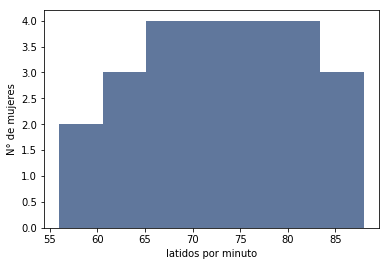

In [6]:
plt.hist(pulso, bins=7)
plt.xlabel("latidos por minuto")
plt.ylabel("N° de mujeres")
plt.show()

Este [histograma](https://es.wikipedia.org/wiki/Histograma) nos muestra la forma en que se distribuyen los datos, pero no nos muestra los datos individuales. Para esto podríamos graficar su [diagrama de tallos y hojas](https://es.wikipedia.org/wiki/Diagrama_de_tallos_y_hojas) de la siguiente manera:

In [7]:
# Diagrama de tallos y hojas
def tallos(d):
    "Genera un simple diagramas de tallos y hojas"
    l,t=np.sort(d),10
    O=range(int(l[0]-l[0]%t),int(l[-1]+11),t)
    I=np.searchsorted(l,O)
    for e,a,f in zip(I,I[1:],O): 
        print('%3d|'%(f/t),*(l[e:a]-f),sep='')
        
tallos(pulso)

  5|6
  6|04448888
  7|22226666
  8|0000448


Como vemos, la distribución del [diagrama de tallos y hojas](https://es.wikipedia.org/wiki/Diagrama_de_tallos_y_hojas) es similar a la del  [histograma](https://es.wikipedia.org/wiki/Histograma), pero en este caso si podemos ver los valores de nuestras observaciones. El diagrama se lee así: Por un lado tenemos las decenas de los latidos, las cuales constituyen los *tallos* de nuestro diagrama (los valores antes del *pipe* o barra vertical "|") y luego vamos agrando *hojas* a estos *tallos* , representadas por las unidades de cada latido. De esta forma 5|6, significa que solo aparece el valor 56 una sola vez, en cambio 8|0000, significa que tenemos el valor 80 observado en 4 oportunidades.

### Diagrama de dispersión

Hasta aquí venimos graficando únicamente una sola [variable cuantitativa](https://es.wikipedia.org/wiki/Cantidad) pero ¿qué pasa si queremos trabajar con dos variables? Para estos casos existe el [diagrama de dispersión](https://es.wikipedia.org/wiki/Diagrama_de_dispersi%C3%B3n). El [diagrama de dispersión](https://es.wikipedia.org/wiki/Diagrama_de_dispersi%C3%B3n) es una de las formas más comunes que existen para visualizar [datos](https://es.wikipedia.org/wiki/Dato) y constituye una de las mejores forma de observar relaciones entre dos [variables cuantitativas](https://es.wikipedia.org/wiki/Cantidad). Veremos que se puede observar un montón de cosas por el solo hecho de mirar. Este diagrama es una de las mejores formas de visualizar las asociaciones que pueden existir entre nuestros datos.

El [diagrama de dispersión](https://es.wikipedia.org/wiki/Diagrama_de_dispersi%C3%B3n) empareja los valores de dos [variables cuantitativas](https://es.wikipedia.org/wiki/Cantidad) y luego los representa como puntos geométricos dentro de un diagrama cartesiano. Por ejemplo, volviendo a nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) [faithful](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat), podríamos emparejar a las variables `eruptions` y `waiting` en la misma observación como coordenadas (x, y) y luego graficarlas en el eje cartesiano. Con la ayuda de [Python](http://python.org/) podríamos generar el [diagrama de dispersión](https://es.wikipedia.org/wiki/Diagrama_de_dispersi%C3%B3n) del siguiente modo:

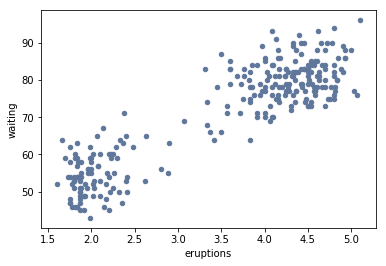

In [8]:
# diagrama de dispersión
disp= faithful.plot(kind='scatter', x='eruptions', y='waiting')

Como podemos ver con solo observar la dispersión de los [datos](https://es.wikipedia.org/wiki/Dato) parece existir una *relación lineal* entre los datos de este [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos).

### Medidas de tendencia central

Una vez que ya nos dimos una buena idea visual de como se distribuyen los [datos](https://es.wikipedia.org/wiki/Dato) y de las relaciones que pueden existir entre los mismos, podemos pasar a calcular medidas numéricas propias de la [estadística descriptiva](https://es.wikipedia.org/wiki/Estad%C3%ADstica_descriptiva). En general, suele ser interesante conocer cual puede ser el *promedio o valor central* al que tiende la [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) de nuestros [datos](https://es.wikipedia.org/wiki/Dato), para esto se utilizan las [medidas de tendencia central](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central), entre las que podemos encontrar a:

* La [media aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica)
* La [media ponderada](https://es.wikipedia.org/wiki/Media_ponderada)
* La [media geométrica](https://es.wikipedia.org/wiki/Media_geom%C3%A9trica)
* La [media armónica](https://es.wikipedia.org/wiki/Media_arm%C3%B3nica)
* La <a href="https://es.wikipedia.org/wiki/Mediana_(estad%C3%ADstica)">mediana</a>
* La [media truncada](https://es.wikipedia.org/wiki/Media_truncada)
* La <a href="https://es.wikipedia.org/wiki/Moda_(estad%C3%ADstica)">moda</a>

Veamos como podemos calcularlas con [Python](http://python.org/):

#### Media aritmética

La [media aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) es el valor obtenido al sumar todos los datos y dividir el resultado entre el número total elementos. La calculamos con el método `mean`.

In [9]:
# media de variable eruptions
faithful['eruptions'].mean()

3.4877830882352936

#### Media ponderada

La [media ponderada](https://es.wikipedia.org/wiki/Media_ponderada) es apropiada cuando en un [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) cada dato tiene una importancia relativa (o peso) respecto de los demás. Como esta media no aplica para nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) no la vamos a calcular.

#### Media geométrica

La [media geométrica](https://es.wikipedia.org/wiki/Media_geom%C3%A9trica) es útil cuando queremos comparar cosas con propiedades muy diferentes; también es es recomendada para datos de progresión geométrica, para promediar razones, interés compuesto y números índices. Se calcula tomando la [raíz n-ésima](https://es.wikipedia.org/wiki/Radicaci%C3%B3n) del producto de todos los [datos](https://es.wikipedia.org/wiki/Dato). La calculamos con la función `gmean` de [SciPy](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [10]:
# media geometrica
stats.gmean(faithful['eruptions'])

3.2713131325361786

#### Media armónica

La [media armónica](https://es.wikipedia.org/wiki/Media_arm%C3%B3nica) promedia el número de elementos y los divide por la suma de sus inversos. La [media armónica](https://es.wikipedia.org/wiki/Media_arm%C3%B3nica) es siempre la media más baja y es recomendada para promediar velocidades. La calculamos con la función `hmean` de [SciPy](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [11]:
# media armónica
stats.hmean(faithful['eruptions'])

3.038933049947261

#### Mediana

La [mediana](https://es.wikipedia.org/wiki/Mediana) representa el valor de posición central en un [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos) ordenados. La podemos calcular utilizando el método `median` de [Pandas](http://pandas.pydata.org/)

In [12]:
# mediana
faithful['eruptions'].median()

4.0

#### Media truncada

La [media truncada](https://es.wikipedia.org/wiki/Media_truncada) es una mezcla entre la [media aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) y la [mediana](https://es.wikipedia.org/wiki/Mediana). Para calcular el promedio previamente se descartan porciones en el extremo inferior y superior de la [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) de los [datos](https://es.wikipedia.org/wiki/Dato). En [Python](http://python.org/) podemos utilizar la función `trim_mean` de [SciPy](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [13]:
# media truncada, recortando el 10 superior e inferior
stats.trim_mean(faithful['eruptions'], .10)

3.5298073394495413

#### Moda

Por último, la <a href="https://es.wikipedia.org/wiki/Moda_(estad%C3%ADstica)">moda</a> es el valor que tiene mayor frecuencia absoluta. Son los picos que vemos en el [histograma](https://es.wikipedia.org/wiki/Histograma). Dependiendo de la la [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) de los [datos](https://es.wikipedia.org/wiki/Dato) puede existir más de una, como en el caso de la variable `eruptions`. La calculamos con el método `mode`.

In [14]:
# moda
faithful['eruptions'].mode()

0    1.867
1    4.500
dtype: float64

### Medidas de dispersión

Las [medidas de tendencia central](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central) no son las únicas medidas de resumen [estadístico](http://relopezbriega.github.io/tag/estadistica.html) que podemos calcular; otras medidas también de gran importancia son las [medidas de dispersión](https://es.wikipedia.org/wiki/Medidas_de_dispersi%C3%B3n). Las [medidas de dispersión](https://es.wikipedia.org/wiki/Medidas_de_dispersi%C3%B3n), también llamadas medidas de variabilidad, muestran la variabilidad de una [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad), indicando por medio de un número si las diferentes puntuaciones de una variable están muy alejadas de la [media](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central). Cuanto mayor sea ese valor, mayor será la variabilidad, y cuanto menor sea, más homogénea será a la [media](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central). Así se sabe si todos los casos son parecidos o varían mucho entre ellos. Las principales [medidas de dispersión](https://es.wikipedia.org/wiki/Medidas_de_dispersi%C3%B3n) son:

* La [varianza](https://es.wikipedia.org/wiki/Varianza)
* El [desvío estándar](https://es.wikipedia.org/wiki/Desviaci%C3%B3n_t%C3%ADpica)
* Los [cuartiles](https://es.wikipedia.org/wiki/Cuartil)
* La [covarianza](https://es.wikipedia.org/wiki/Covarianza)
* El [coeficiente de correlación](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson)

Analicemos cada uno de ellos:

#### Varianza

La [varianza](https://es.wikipedia.org/wiki/Varianza) intenta describir la dispersión de los [datos](https://es.wikipedia.org/wiki/Dato). Se define como la [esperanza](https://es.wikipedia.org/wiki/Esperanza_matem%C3%A1tica) del cuadrado de la desviación de dicha variable respecto a su [media](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central). Una [varianza](https://es.wikipedia.org/wiki/Varianza) pequeña indica que los puntos de datos tienden a estar muy cerca de la [media](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central) y por lo tanto el uno al otro, mientras que una [varianza](https://es.wikipedia.org/wiki/Varianza) alta indica que los puntos de datos están muy distribuidos alrededor de la [media](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central) y la una de la otra. La podemos calcular con el método `var`.

In [15]:
# varianza
faithful['eruptions'].var()

1.3027283328494672

#### Desvío estándar

El [desvío estándar](https://es.wikipedia.org/wiki/Desviaci%C3%B3n_t%C3%ADpica) o desviación típica es una medida que se utiliza para cuantificar la cantidad de variación o dispersión de un conjunto de valores de datos. Un [desvío estándar](https://es.wikipedia.org/wiki/Desviaci%C3%B3n_t%C3%ADpica) cerca de 0 indica que los puntos de datos tienden a estar muy cerca de la [media](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central) del conjunto, mientras que un alto [desvío estándar](https://es.wikipedia.org/wiki/Desviaci%C3%B3n_t%C3%ADpica) indica que los puntos de datos se extienden a lo largo de un rango amplio de valores. Se calcula como la raíz cuadrada de la [varianza](https://es.wikipedia.org/wiki/Varianza) y con [Pandas](http://pandas.pydata.org/) lo podemos obtener con el método `std`.

In [16]:
# desvio estándar
faithful['eruptions'].std()

1.1413712511052077

#### Cuartiles

Los [cuartiles](https://es.wikipedia.org/wiki/Cuartil) son los tres puntos que dividen el conjunto de datos en cuatro grupos iguales, cada grupo comprende un cuarto de los [datos](https://es.wikipedia.org/wiki/Dato).El (Q1) se define como el número medio entre el número más pequeño y la [mediana](https://es.wikipedia.org/wiki/Mediana) del [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos). El segundo cuartil (Q2) es la [mediana](https://es.wikipedia.org/wiki/Mediana) de los [datos](https://es.wikipedia.org/wiki/Dato). El tercer cuartil (Q3) es el valor medio entre la [mediana](https://es.wikipedia.org/wiki/Mediana) y el valor más alto del [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos). Para dividir nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) en sus [cuartiles](https://es.wikipedia.org/wiki/Cuartil) utilizamos el método `quantile`.

In [17]:
# cuartiles
faithful['eruptions'].quantile([.25, .5, .75])

0.25    2.16275
0.50    4.00000
0.75    4.45425
Name: eruptions, dtype: float64

Un gráfico relacionado a los [cuartiles](https://es.wikipedia.org/wiki/Cuartil) y describe varias características importantes al mismo tiempo, tales como la dispersión y simetría es el [diagrama de caja](https://es.wikipedia.org/wiki/Diagrama_de_caja). Para su realización se representan los tres [cuartiles](https://es.wikipedia.org/wiki/Cuartil) y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Podemos utilizar la función `boxplot` de [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) para generarlo.

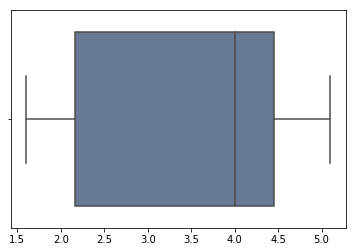

In [18]:
# diagrama de cajas
cajas=sns.boxplot(list(faithful['eruptions']))

Hasta aquí hemos calculado [medidas de dispersión](https://es.wikipedia.org/wiki/Medidas_de_dispersi%C3%B3n) para una sola variable, pero nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) tiene dos [variables cuantitativas](https://es.wikipedia.org/wiki/Cantidad); veamos como podemos calcular medidas combinadas para la dos variables.

#### Covarianza

La [covarianza](https://es.wikipedia.org/wiki/Covarianza) es el equivalente de la [varianza](https://es.wikipedia.org/wiki/Varianza) aplicado a una variable bidimensional. Es la [media aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) de los productos de las desviaciones de cada una de las variables respecto a sus [medias](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central).La covarianza indica el sentido de la [correlación](https://es.wikipedia.org/wiki/Correlaci%C3%B3n) entre las variables; Si es mayor que cero la correlación es directa, en caso de ser menor, la [correlación](https://es.wikipedia.org/wiki/Correlaci%C3%B3n) es inversa. La podemos calcular utilizando el método `cov`.

In [19]:
# covarianza
faithful.cov()

,eruptions,waiting
eruptions,1.302728,13.977808
waiting,13.977808,184.823312


#### Correlación

Por último, el [coeficiente de correlación](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson) es una medida del grado de *dependencia lineal* entre dos variables. El [coeficiente de correlación](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson) oscila entre -1 y 1. Un valor de 1 significa que una [ecuación lineal](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_primer_grado) describe la relación entre las dos variables a la perfección, con todos los puntos de datos cayendo sobre una línea recta de pendiente positiva. Un valor de -1 implica que todos los puntos de datos se encuentran en una línea con pendiente negativa. Un valor de 0 implica que no existe una correlación lineal entre las variables. Lo podemos calcular con el método `corr`.

In [20]:
# coeficiente de correlación
faithful.corr()

,eruptions,waiting
eruptions,1.000000,0.900811
waiting,0.900811,1.000000


Como podemos ver las dos variables tienen una correlación bastante alta, lo que sugiere que están íntimamente relacionadas; a la misma conclusión habíamos llegado al observar el [diagrama de dispersión](https://es.wikipedia.org/wiki/Diagrama_de_dispersi%C3%B3n).

### Resumen estadístico

Hasta aquí hemos calculado tanto las [medidas de tendencia central](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central) como las [medidas de dispersión](https://es.wikipedia.org/wiki/Medidas_de_dispersi%C3%B3n) una por una, pero ¿no sería más conveniente que con un simple comando podemos obtener un resumen [estadístico](http://relopezbriega.github.io/tag/estadistica.html) con las principales medidas? Es por esto que [Pandas](http://pandas.pydata.org/) nos ofrece el método `describe`, un comando para gobernarlos a todos!, el cual nos ofrece un resumen con las principales medidas [estadísticas](http://relopezbriega.github.io/tag/estadistica.html).

In [21]:
# resumen estadístico
faithful['eruptions'].describe()

count    272.000000
mean       3.487783
std        1.141371
min        1.600000
25%        2.162750
50%        4.000000
75%        4.454250
max        5.100000
Name: eruptions, dtype: float64

Siguiendo la misma línea; [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) nos ofrece la función `pairplot` que nos proporciona un resumen gráfico con [histogramas](https://es.wikipedia.org/wiki/Histograma) y [diagramas de dispersión](https://es.wikipedia.org/wiki/Diagrama_de_dispersi%C3%B3n) de las variables de nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos).

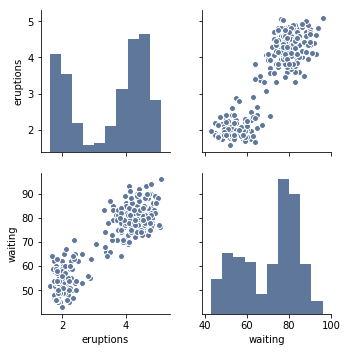

In [22]:
par= sns.pairplot(faithful)

Con esto concluye este cuaderno ahora ya deberían estar en condiciones de poder analizar tanto [variables cuantitativas](https://es.wikipedia.org/wiki/Cantidad) como [variables categóricas](http://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/).